<a href="https://colab.research.google.com/github/someshkr/XGBOOST-Assignment/blob/master/XGBOOST_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [0]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header = None)
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",skiprows = 1,header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [51]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [0]:
df = pd.concat([train_set, test_set], axis=0)

df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [0]:
df.replace(' ?', 'unknown', inplace=True)

In [55]:
df.groupby('workclass').size()

workclass
 Federal-gov          1432
 Local-gov            3136
 Never-worked           10
 Private             33906
 Self-emp-inc         1695
 Self-emp-not-inc     3862
 State-gov            1981
 Without-pay            21
unknown               2799
dtype: int64

In [56]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.160538
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.367108
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [57]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df.drop('education', axis=1,inplace=True)

df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,workclass: Private,workclass: Self-emp-inc,workclass: Self-emp-not-inc,workclass: State-gov,workclass: Without-pay,workclass:unknown,marital_status: Divorced,marital_status: Married-AF-spouse,marital_status: Married-civ-spouse,marital_status: Married-spouse-absent,marital_status: Never-married,marital_status: Separated,marital_status: Widowed,occupation: Adm-clerical,occupation: Armed-Forces,occupation: Craft-repair,occupation: Exec-managerial,occupation: Farming-fishing,occupation: Handlers-cleaners,occupation: Machine-op-inspct,occupation: Other-service,occupation: Priv-house-serv,occupation: Prof-specialty,occupation: Protective-serv,occupation: Sales,occupation: Tech-support,occupation: Transport-moving,occupation:unknown,relationship: Husband,relationship: Not-in-family,...,native_country: China,native_country: Columbia,native_country: Cuba,native_country: Dominican-Republic,native_country: Ecuador,native_country: El-Salvador,native_country: England,native_country: France,native_country: Germany,native_country: Greece,native_country: Guatemala,native_country: Haiti,native_country: Holand-Netherlands,native_country: Honduras,native_country: Hong,native_country: Hungary,native_country: India,native_country: Iran,native_country: Ireland,native_country: Italy,native_country: Jamaica,native_country: Japan,native_country: Laos,native_country: Mexico,native_country: Nicaragua,native_country: Outlying-US(Guam-USVI-etc),native_country: Peru,native_country: Philippines,native_country: Poland,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia,native_country:unknown
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country: Trinadad&Tobago    0
native_country: United-States      0
native_country: Vietnam            0
native_country: Yugoslavia         0
native_country:unknown             0
Length: 93, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

df.fillna(' 0', inplace=True)
X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = scale(X)
y = np.array(df['wage_class'])



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.295030 using {'learning_rate': 0.3}
-0.687357 (0.000037) with: {'learning_rate': 0.0001}
-0.640006 (0.000333) with: {'learning_rate': 0.001}
-0.413168 (0.002281) with: {'learning_rate': 0.01}
-0.299649 (0.005960) with: {'learning_rate': 0.1}
-0.296471 (0.006437) with: {'learning_rate': 0.2}
-0.295030 (0.006180) with: {'learning_rate': 0.3}


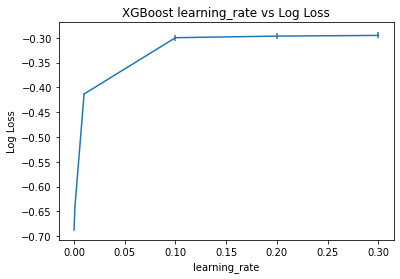

In [62]:

plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.show()

Best: -0.293780 using {'learning_rate': 0.1, 'n_estimators': 500}
-0.640006 (0.000333) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.501023 (0.001374) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.413168 (0.002281) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.308532 (0.005189) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.299649 (0.005960) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.293780 (0.006511) with: {'learning_rate': 0.1, 'n_estimators': 500}


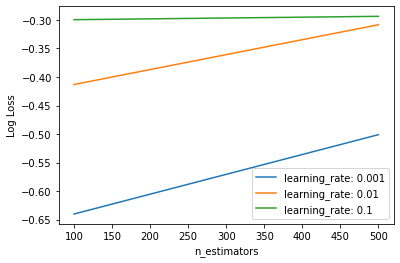

In [65]:
from sklearn.preprocessing import LabelEncoder
import numpy
# grid search
model = XGBClassifier()
n_estimators = [100, 500]
learning_rate = [ 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()

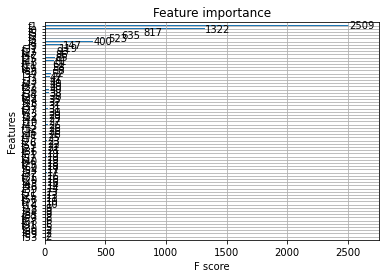

training set auc: 0.8625243115979118
test set auc: 0.8625243115979118
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
The Accuracy  is 0.8625243115979118


In [66]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))